### Crop Geotiff (one way)

In [38]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, LineString, Polygon
import rasterio
import json
from rasterio.mask import mask
from rasterio.plot import show
import requests

In [39]:
polygon_points = [[159362.70088172704, 239936.7117844522],
 [159351.41384171695, 239941.70557645336],
 [159347.94644971192, 239934.70359244943],
 [159342.96244971454, 239937.03754445165],
 [159338.10510570556, 239926.8673684448],
 [159341.3973937109, 239925.33898444474],
 [159341.5757617131, 239925.69533644244],
 [159342.15035370737, 239925.4817044437],
 [159343.78683371097, 239924.87306444347],
 [159345.2128817141, 239928.08138444647],
 [159343.59444971383, 239928.81956044585],
 [159343.1514417082, 239929.02167244628],
 [159344.22536171228, 239931.28880844638],
 [159344.5845297128, 239931.10794444755],
 [159346.35835371166, 239930.21488844603],
 [159346.8604977131, 239931.15453644842],
 [159347.06555371732, 239931.53828044608],
 [159358.13678572327, 239926.30180044472],
 [159362.70088172704, 239936.7117844522]]

In [40]:
def polygon_objects(polygons):
    polygon_objects = []
    for polygon in polygons:
        tuple_points = []
        for point in polygon:
            tuple_points.append(tuple(point))
        polygon_objects.append(Polygon(tuple_points))
    return polygon_objects

In [41]:
shape = polygon_objects([polygon_points])

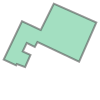

In [42]:
shape[0]

In [43]:
DSM_img_path = "Data/DSM/DSM-1/GeoTIFF/DHMVIIDSMRAS1m_k01.tif"
DSM_img = rasterio.open(DSM_img_path)
DTM_img_path = "Data/DTM/DTM-1/GeoTIFF/DHMVIIDTMRAS1m_k01.tif"
DTM_img = rasterio.open(DTM_img_path)

In [44]:
DSM_out_img, out_transform = mask(DSM_img, shape, crop = True)
DTM_out_img, out_transform = mask(DTM_img, shape, crop = True)

In [48]:
image = DSM_out_img-DTM_out_img # this is a chm of the building

In [53]:
image.shape
#image.shape[1] = y
#image.shape[2] = x

(1, 18, 25)

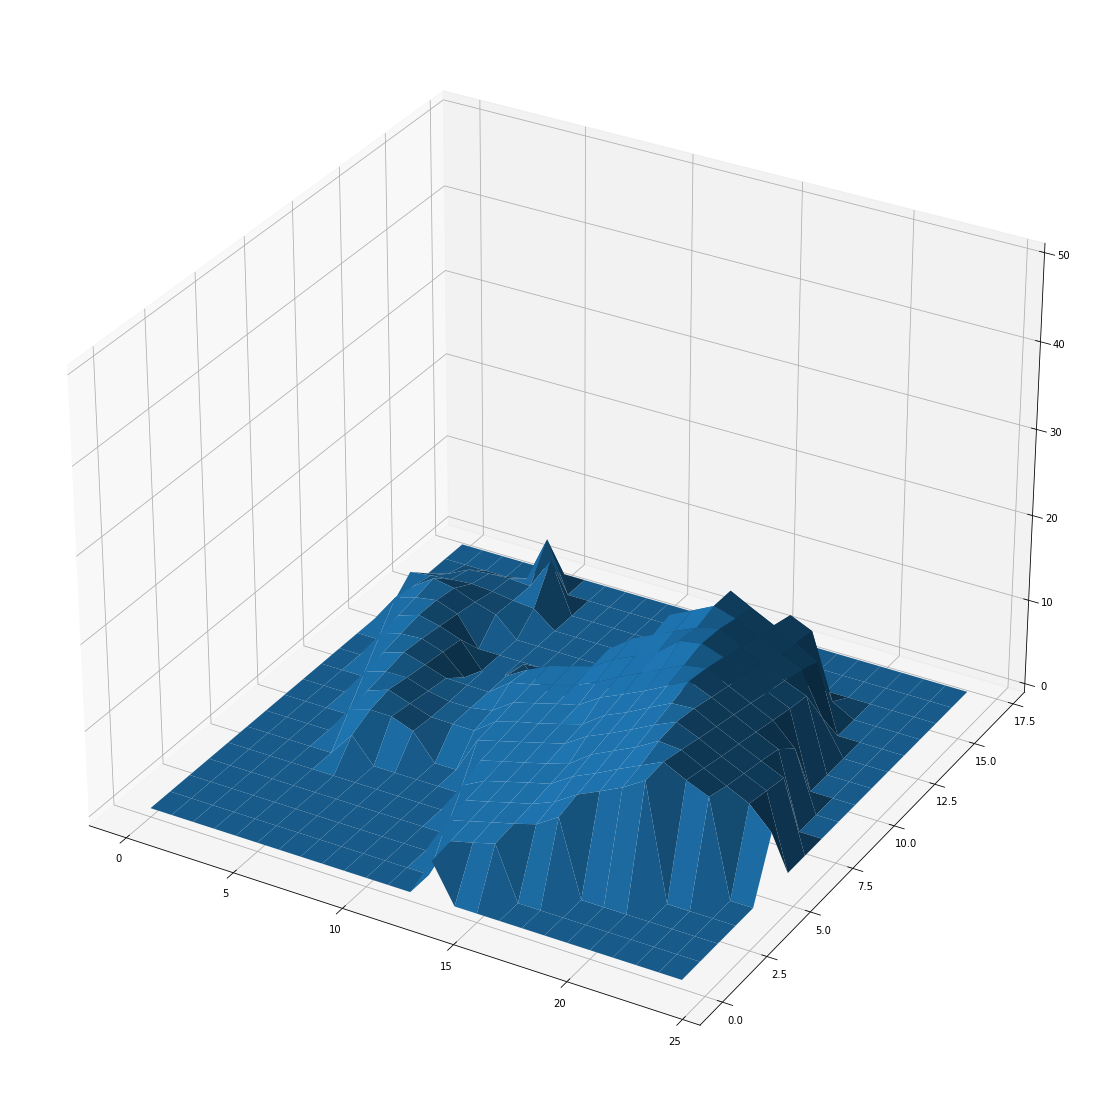

In [51]:
x, y = np.meshgrid(np.arange(25), np.arange(18))
fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(x, y, image[0])
ax.set_zlim(0, 50)
plt.show()